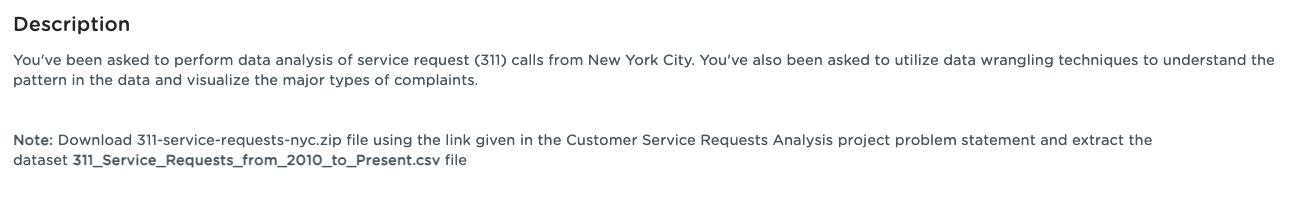

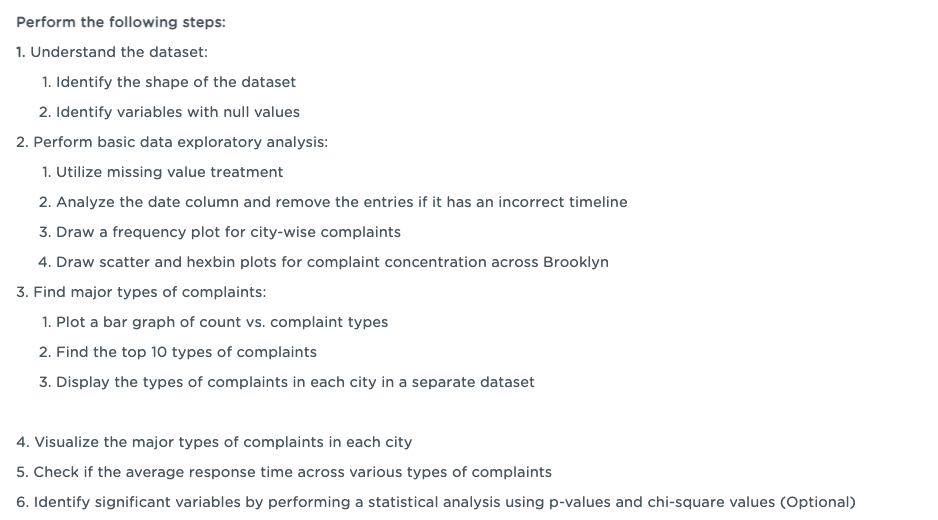

In [24]:
#Import the necessary library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')

In [26]:
#1. > 1 Shape of the data.
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
print(df.shape)
df.sample(7)

(364558, 53)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
17950,32190270,12/12/2015 11:06:41 PM,12/13/2015 10:58:58 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,10040.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.862926,-73.927767,"(40.8629258638539, -73.92776655089192)"
126652,31459079,09/03/2015 07:58:45 PM,09/03/2015 10:46:23 PM,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11379.0,68-44 76 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.709662,-73.875891,"(40.70966239656036, -73.875891170116)"
222150,30828452,06/11/2015 08:11:24 PM,06/11/2015 09:12:39 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11355.0,45-51 ROBINSON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.752588,-73.818181,"(40.75258787959271, -73.81818142943737)"
45286,31991888,11/15/2015 11:38:42 PM,11/16/2015 01:46:12 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10028.0,1254 LEXINGTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778502,-73.956325,"(40.77850170871053, -73.95632492668035)"
283399,30422614,04/18/2015 01:16:30 AM,04/18/2015 04:50:51 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11213.0,1509A PARK PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.672172,-73.927148,"(40.6721715116416, -73.92714761294285)"
285066,30415020,04/16/2015 04:20:08 PM,04/16/2015 05:20:52 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10036.0,1585 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760215,-73.985334,"(40.760215360467875, -73.98533373855116)"
113585,31535128,09/14/2015 07:49:51 PM,09/14/2015 10:18:13 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10025.0,107 WEST 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.801411,-73.962002,"(40.80141124989614, -73.96200232327737)"


In [6]:
#1. > 2 No of null values in the column.
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [8]:
#Percentage of null value in individual column.
df.isna().mean() * 100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.653120
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.783255
Location Type                       0.036483
Incident Zip                        0.822366
Incident Address                   14.181283
Street Name                        14.181283
Cross Street 1                     15.686941
Cross Street 2                     15.856187
Intersection Street 1              85.977540
Intersection Street 2              86.144317
Address Type                        0.892039
City                                0.822091
Landmark                           99.897136
Facility Type                       0.655314
Status                              0.000000
Due Date                            0.000823
Resolution Description              0.000000
Resolution

In [23]:
#2 > 1.
#Imputing the null values in column with % mean values <= 5%.
#Strategy: For Continous column > mean 
#and For categorical column > mode.
se_mode = SimpleImputer(strategy = 'most_frequent')
se_mode.fit_transform(df[])


df['Closed Date'] = df['Closed Date'].fillna(df['Closed Date'].mode())
df['Descriptor'] = df['Descriptor'].fillna(df['Descriptor'].mode())
df['Location Type'] = df['Location Type'].fillna(df['Location Type'].mode())
df['Incident Zip'] = df['Incident Zip'].fillna(df['Incident Zip'].mode())
df['Address Type'] = df['Address Type'].fillna(df['Address Type'].mode())
df['City'] = df['City'].fillna(df['City'].mode())
df['Facility Type'] = df['Facility Type'].fillna(df['Facility Type'].mode())
df['Due Date'] = df['Due Date'].fillna(df['Due Date'].mode())

In [27]:
se_mode = SimpleImputer(strategy = 'most_frequent')
df_imputed = se_mode.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns = df.columns)

ValueError: Shape of passed values is (364558, 48), indices imply (364558, 53)

In [ ]:
d

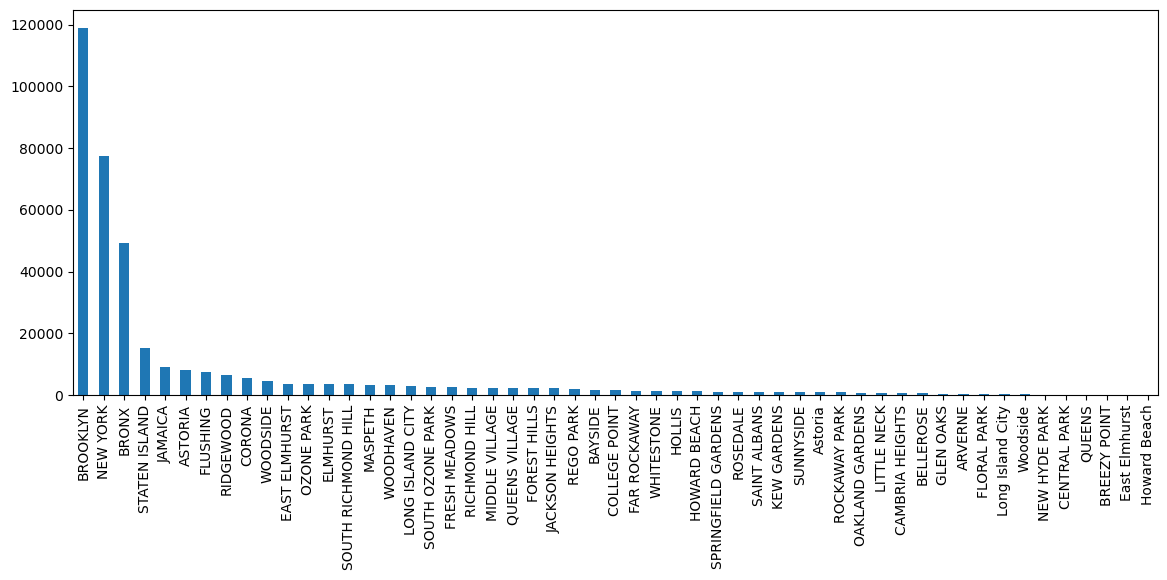

In [18]:
#2.
plt.figure(figsize = (14,5))
(df['City'].value_counts()).plot(kind = 'bar')
plt.show()

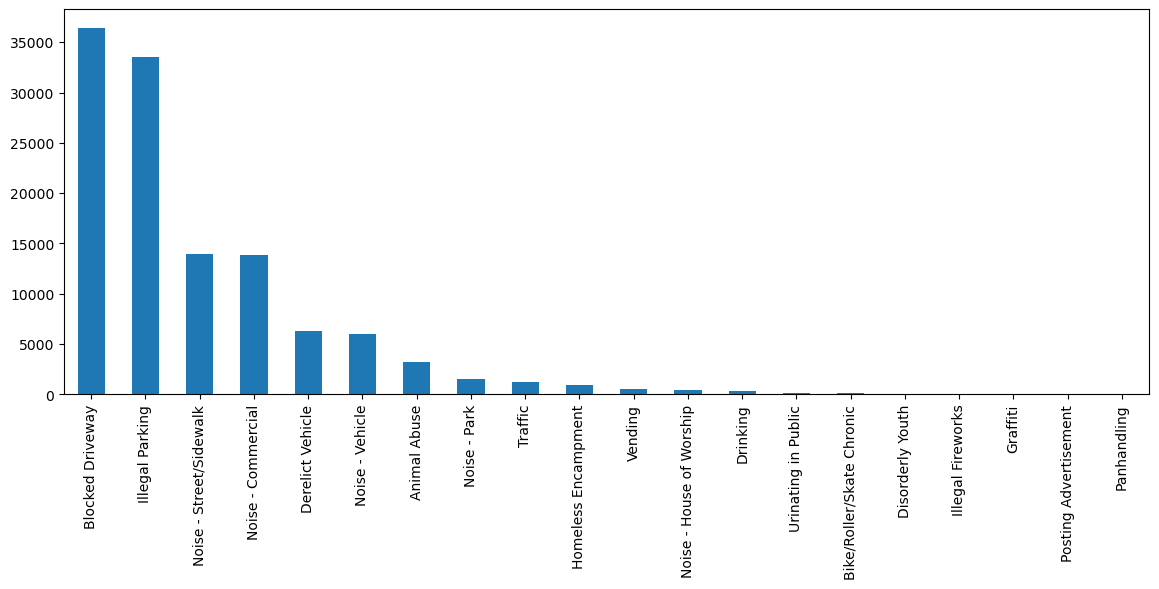

In [22]:
plt.figure(figsize = (14,5))
(df[df['City'] == 'BROOKLYN']['Complaint Type'].value_counts()).plot(kind = 'bar')
plt.show()

In [ ]:
sns.jointplot(data = df[df['City'] == 'BROOKLYN'], x = 'Complaint Type', y = )